In [86]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [87]:
my_data_dir = 'C:\\Users\\MANAS KASLIWAL\\Downloads\\cell_images\\cell_images'

In [88]:
os.listdir(my_data_dir) 

['test', 'train']

In [89]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [90]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [91]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [92]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [93]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [94]:
para_img= imread(para_cell)

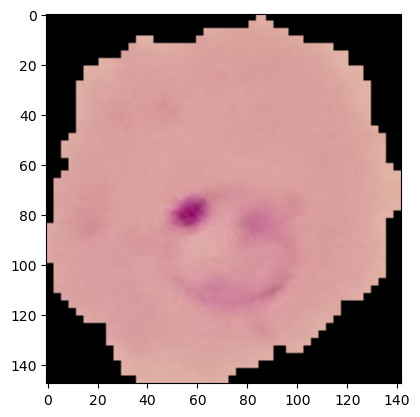

In [95]:
plt.imshow(para_img)

In [96]:
para_img.shape

(148, 142, 3)

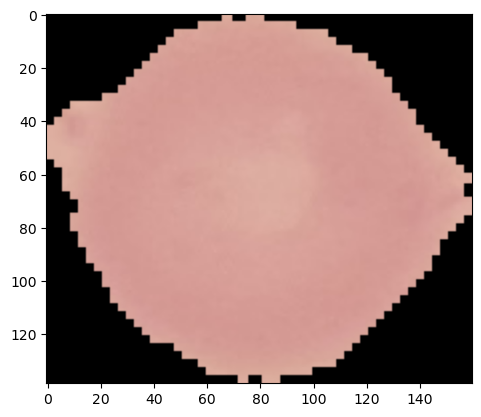

In [97]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [98]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [99]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [100]:
unifected_cell.shape

(139, 160, 3)

In [101]:
para_img.shape

(148, 142, 3)

In [102]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

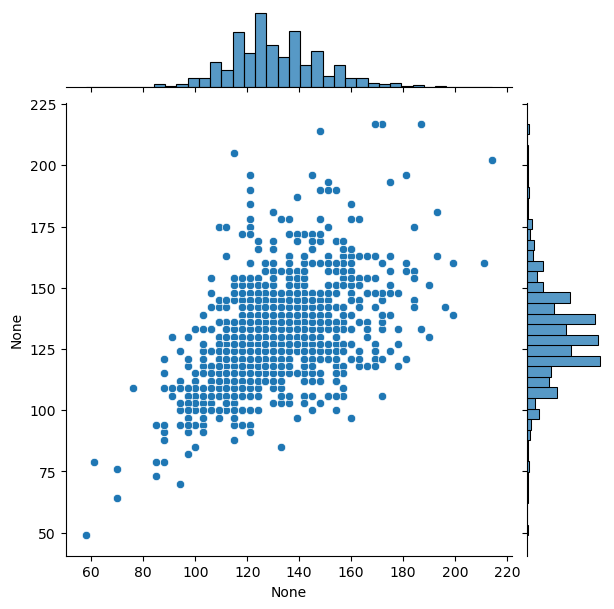

In [103]:
sns.jointplot(x=dim1,y=dim2)

In [104]:
np.mean(dim1)

130.92538461538462

In [105]:
np.mean(dim2)

130.75

In [106]:
image_shape = (130,130,3)

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [108]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  DEPRECATED.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_

In [109]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

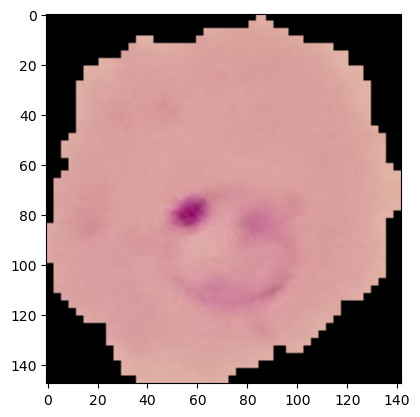

In [110]:
plt.imshow(para_img)

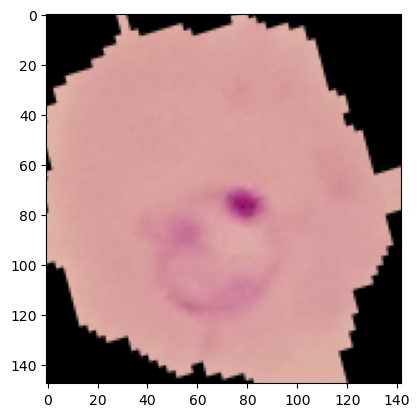

In [111]:
plt.imshow(image_gen.random_transform(para_img))

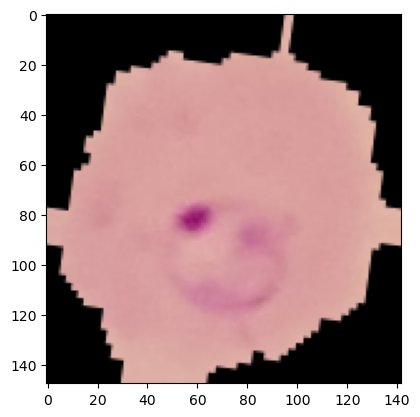

In [112]:
plt.imshow(image_gen.random_transform(para_img))

In [113]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [114]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [116]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128,activation='relu'))


model.add(Dropout(0.5))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [120]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.src.legacy.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.src.legacy.preprocessing.image.ImageDataGenerator instance



In [121]:
batch_size = 16

In [122]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [123]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [124]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
results = model.fit(train_image_gen,epochs=20,
                             validation_data=test_image_gen,
                            callbacks=[early_stop])

Epoch 1/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 304s 193ms/step - accuracy: 0.5392 - loss: 1.3796 - val_accuracy: 0.5662 - val_loss: 0.6814
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 316s 202ms/step - accuracy: 0.5811 - loss: 0.6763 - val_accuracy: 0.5858 - val_loss: 0.6736
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 237s 151ms/step - accuracy: 0.5833 - loss: 0.6768 - val_accuracy: 0.5835 - val_loss: 0.6797
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/step - accuracy: 0.5957 - loss: 0.6727 - val_accuracy: 0.6038 - val_loss: 0.6664
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 227s 145ms/step - accuracy: 0.5915 - loss: 0.6715 - val_accuracy: 0.6088 - val_loss: 0.6636
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 228s 146ms/step - accuracy: 0.6108 - loss: 0.6624 - val_accuracy: 0.6088 - val_loss: 0.6614
Epoch 7/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 227s 145ms/step - accuracy: 0.7253 - loss: 0.5395 - val_accuracy: 0.9231 - val_loss: 0.2380
Epoch 8/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 228s 146ms/step - ac

In [127]:
losses = pd.DataFrame(model.history.history)

<Axes: >

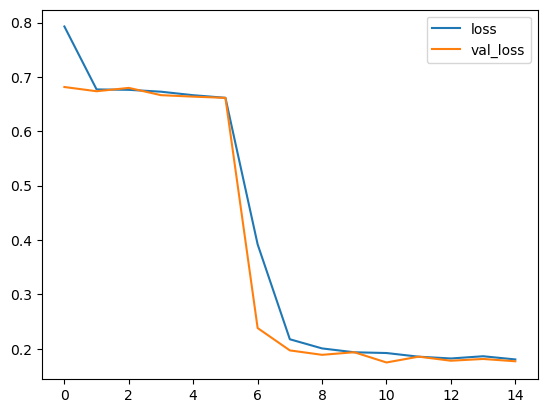

In [128]:
losses[['loss','val_loss']].plot()

In [129]:
model.metrics_names

['loss', 'compile_metrics']

In [131]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.9227 - loss: 0.2243


[0.17672649025917053, 0.943461537361145]

In [132]:
from tensorflow.keras.preprocessing import image

In [133]:
pred_probabilities = model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step


In [134]:
pred_probabilities

array([[7.6764874e-05],
       [6.8077723e-05],
       [1.4500850e-05],
       ...,
       [9.4263411e-01],
       [9.4450092e-01],
       [9.4344532e-01]], dtype=float32)

In [135]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [136]:
predictions = pred_probabilities > 0.5

In [137]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

In [139]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1300
           1       0.92      0.97      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [140]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1195,  105],
       [  38, 1262]], dtype=int64)

# Predicting on an Image

In [141]:
para_cell

'C:\\Users\\MANAS KASLIWAL\\Downloads\\cell_images\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [142]:
my_image = image.load_img(para_cell,target_size=image_shape)

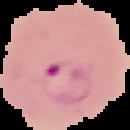

In [143]:
my_image

In [144]:
type(my_image)

PIL.Image.Image

In [145]:
my_image = image.img_to_array(my_image)

In [146]:
type(my_image)

numpy.ndarray

In [147]:
my_image.shape

(130, 130, 3)

In [148]:
my_image = np.expand_dims(my_image, axis=0)

In [149]:
my_image.shape

(1, 130, 130, 3)

In [150]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[0.00286101]], dtype=float32)

In [151]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [152]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}